In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
salary=[11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99,101,68,77,110,140]


In [ ]:
# five point summary
#min 25th, 50th , 75th, 100th
np.quantile(salary,[0,0.25,0.5,0.75,1])
df=pd.DataFrame(salary,columns=['salary'])
df

,salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [ ]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


Text(0.5, 1.0, 'box plot')

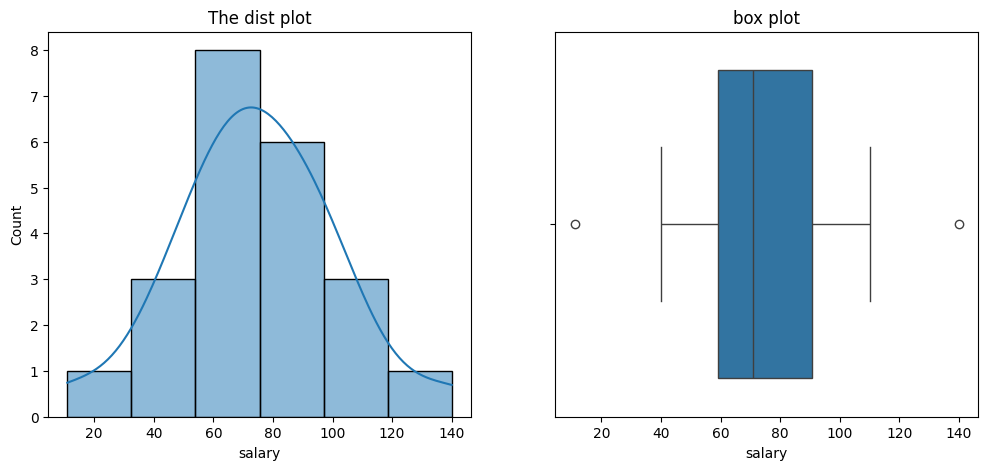

In [ ]:
# to check outlier>> distplot , boxplot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary'],kde=True)
plt.title("The dist plot")
plt.subplot(1,2,2)
sns.boxplot(x=df['salary'])
plt.title("box plot")

In [ ]:
#Dropping the outlier
#capping the outlier
#replace the mean/median

In [ ]:
#Dropping the outlier
q1=df['salary'].quantile(0.25)
q3=df['salary'].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR

upper_fence=q3+1.5*IQR
lower_fence

11.375

In [ ]:
upper_fence

138.375

In [ ]:
df_filter = df[(df.salary>=lower_fence) & (df.salary<=upper_fence)]
df_filter

,salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [ ]:
df_filter.shape

(20, 1)

Text(0.5, 1.0, 'box plot')

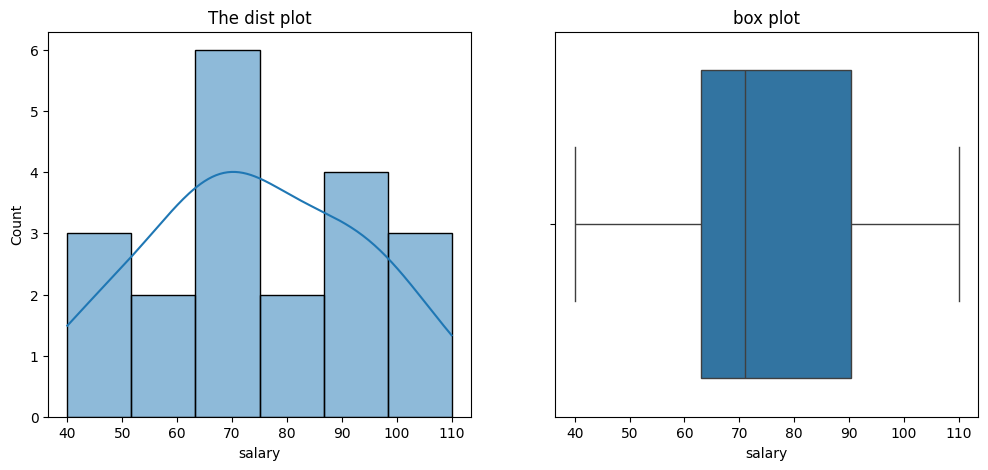

In [ ]:
# to check outlier>> distplot , boxplot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_filter['salary'],kde=True)
plt.title("The dist plot")
plt.subplot(1,2,2)
sns.boxplot(x=df_filter['salary'])
plt.title("box plot")

In [ ]:
#imputation of mean and median
df['salary_imputed_mean'] = np.where(
    (df['salary'] >= upper_fence) | (df['salary'] <= lower_fence),
    np.mean(df['salary']),
    df['salary']
)
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


Text(0.5, 1.0, 'box plot')

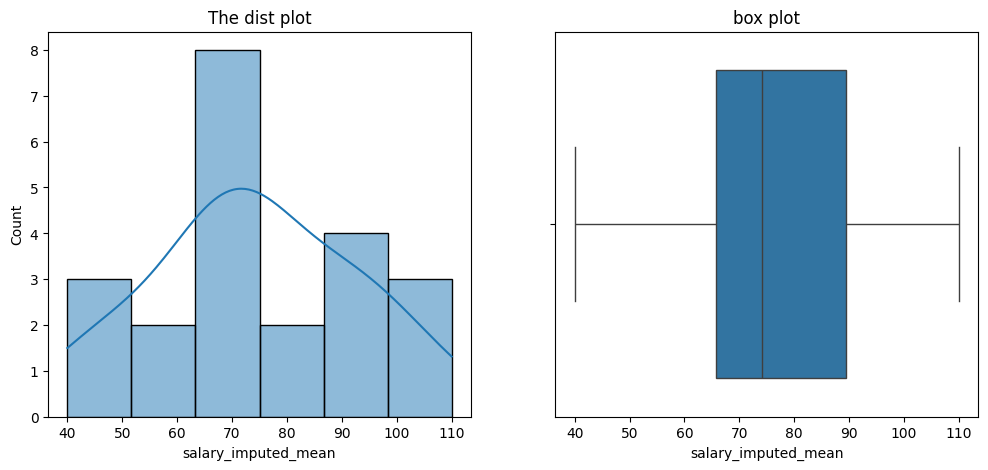

In [ ]:
# to check outlier>> distplot , boxplot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_mean'],kde=True)
plt.title("The dist plot")
plt.subplot(1,2,2)
sns.boxplot(x=df['salary_imputed_mean'])
plt.title("box plot")

In [ ]:
df['salary_imputed_median'] = np.where(
    (df['salary'] >= upper_fence) | (df['salary'] <= lower_fence),
    np.median(df['salary']),
    df['salary']
)
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


Text(0.5, 1.0, 'box plot')

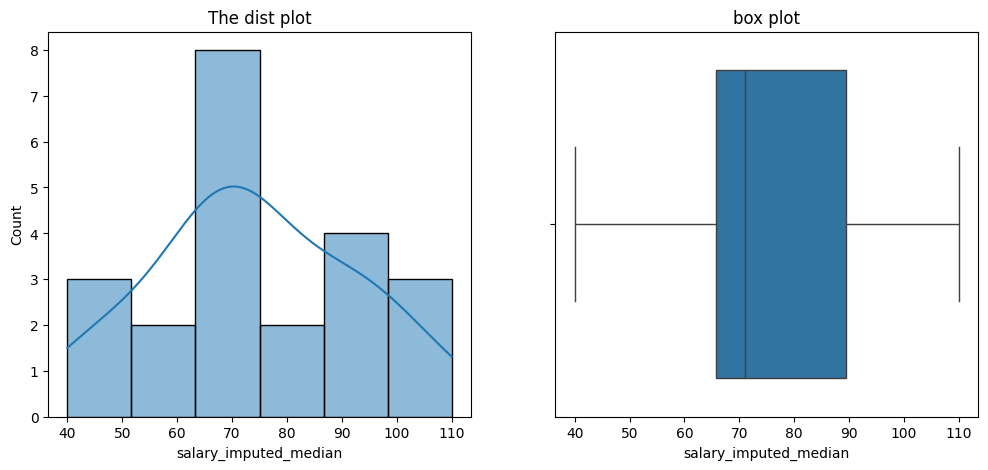

In [ ]:
# to check outlier>> distplot , boxplot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_median'],kde=True)
plt.title("The dist plot")
plt.subplot(1,2,2)
sns.boxplot(x=df['salary_imputed_median'])
plt.title("box plot")

In [ ]:
#capping>> replacing with the nearest value which is not a outlier
lower_cap=df['salary'].quantile(0.05) # Lower cap as 5th percentile
upper_cap=df['salary'].quantile(0.95) # upper cap as 5th percentile

In [ ]:
print(lower_cap , upper_cap)
#replace outliers with the cap
df['salary_cap']=np.where(df['salary']<lower_cap,lower_cap,np.where(df['salary']> upper_cap,upper_cap,df['salary']))
df

40.25 109.55


,salary,salary_imputed_mean,salary_imputed_median,salary_cap
0,11,74.318182,71.0,40.25
1,40,40.000000,40.0,40.25
2,45,45.000000,45.0,45.00
3,68,68.000000,68.0,68.00
4,65,65.000000,65.0,65.00
5,68,68.000000,68.0,68.00
6,78,78.000000,78.0,78.00
7,90,90.000000,90.0,90.00
8,57,57.000000,57.0,57.00
9,74,74.000000,74.0,74.00
